In [1]:
import  pandas as pd 
from pandas import Series,DataFrame
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

### 2.1 Build a Batch Statistical Process Control model

In [2]:
bakers = pd.read_excel('bakers_yeast_reference_batches.xlsx')
bakers

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


**1) To calculate how many batches are there in the data.** 

We can notice from the 'Time' column that whenever time is '0' it means that a fresh batch is starting.
So we need to find how many times 'Time' is 0 in order to estimate the total number of batches

In [3]:
(bakers['Time']==0).value_counts()

False    1312
True       16
Name: Time, dtype: int64

Therefore, the total number of batches are 16

**To calculate the duration of each batch**

In [4]:
duration = bakers['Time'].max()
duration

13.6667

Therefore, the duration of each batch is 13.6667 hours

In [5]:
max_index = bakers['Time'].idxmax()
max_index

82

In [6]:
print('Data points per batch ', max_index+1)

Data points per batch  83


**Therefore, there are 83 data points for every batch**

**8 variables are measured namely Time, ethanol concentration, Temperature, Molasses flowrate, NH3 flow, Air flow, level and pH**

**2) Plot the variables time-profiles in a 2X4 subplot** 

In [7]:
bakers.drop(columns = ['Unnamed: 0','Primary ID','BatchID'], inplace = True)
bakers

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...
1323,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


In [8]:
bakers.set_index('Time', inplace=True)
bakers

,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
Time,,,,,,,
0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...
13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553


Text(0.5, 1.0, 'pH vs Time')

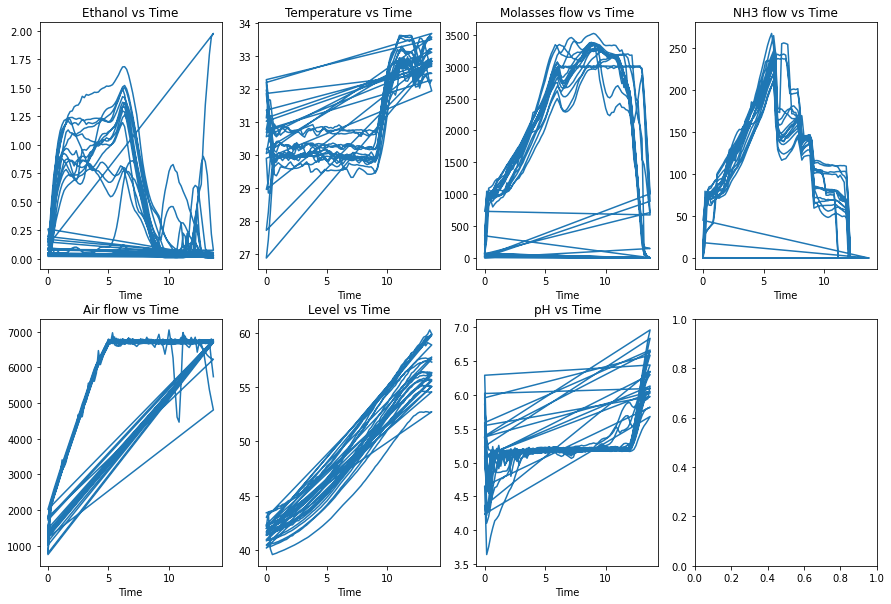

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
bakers['Ethanol'].plot(ax=axes[0,0]); axes[0,0].set_title('Ethanol vs Time')
bakers['Temperature'].plot(ax=axes[0,1]); axes[0,1].set_title('Temperature vs Time')
bakers['Molasses flow'].plot(ax=axes[0,2]); axes[0,2].set_title('Molasses flow vs Time')
bakers['NH3 flow'].plot(ax=axes[0,3]); axes[0,3].set_title('NH3 flow vs Time')
bakers['Air flow'].plot(ax=axes[1,0]); axes[1,0].set_title('Air flow vs Time')
bakers['Level'].plot(ax=axes[1,1]); axes[1,1].set_title('Level vs Time')
bakers['pH'].plot(ax=axes[1,2]); axes[1,2].set_title('pH vs Time')

KEY INSIGHTS:

1) Inspecting the above graphs, the variable which is tightly controlled is 'Level'. For an increase in time, a linear increase of level
can be noticed.
2) The variation of Air flow wrt time also shows a similar variation. The Air flow increases as time is increased.
3) The variables which have the largest variability are Ethanol concentration, Temperature, Molasses flow, NH3 flow and pH. This is because,
we do not observe a linear change wrt time. As time increases, these variables change non-linearly i.e the variables increase or decrease
irregularly over a period of time.

In [10]:
bakers_1 = pd.read_excel('bakers_yeast_reference_batches.xlsx')
bakers_1

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


**3) Select the features (including the Time column), pre-process the data and perform
PCA with 5 principal components.**

First column and second column (Unnamed: 0) and Primary ID are identifiers so we can drop them
After pre-processing, we can use the remaining columns for PCA

In [11]:
# Drop columns
bakers_1.drop(columns = ['Unnamed: 0','Primary ID','BatchID'], inplace = True)
bakers_1

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...
1323,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


In [12]:
scaler = StandardScaler()
scaler

StandardScaler()

In [13]:
bakers_1_scaled = scaler.fit_transform(bakers_1)
bakers_1_scaled

array([[-1.71130681, -1.04011805,  0.84597751, ..., -3.10825991,
        -0.96636672,  1.90190383],
       [-1.66956753, -1.042825  ,  0.50253889, ..., -2.61974424,
        -0.954013  ,  0.32731927],
       [-1.62782851, -1.04192268, -0.06621858, ..., -2.49309872,
        -0.93948474, -0.16307905],
       ...,
       [ 1.62781988, -1.13278386,  1.53606669, ...,  0.61527817,
         1.63473666,  3.32033889],
       [ 1.66956742, -1.13276288,  1.54361479, ...,  0.24514353,
         1.65241428,  3.40421753],
       [ 1.71131495, -1.13269993,  1.54787064, ..., -0.07730339,
         1.63473666,  3.3977962 ]])

Running the Principal Component Analysis below.

In [14]:
pca = PCA(n_components=5, svd_solver='full')

In [15]:
pca_scores = pca.fit_transform(bakers_1_scaled)

In [16]:
pca_scores.shape

(1328, 5)

The number of columns has now changed to 5 for PCA

In [17]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = bakers_1.index)


**4) In order to plot the scores-loading plot, we need to pivot the scores BatchID**

In [18]:
bakers_2 = pd.read_excel('bakers_yeast_reference_batches.xlsx')
scores_pd['BatchID'] = bakers_2['BatchID']
scores_pd['Time'] = bakers_2['Time']
scores_pd

,PC1,PC2,PC3,PC4,PC5,BatchID,Time
0,-0.808176,4.508288,-0.200368,1.295502,-0.754945,bb,0.000000
1,-1.303347,3.391210,0.824346,0.666865,-0.552935,bb,0.166667
2,-1.630004,3.073121,1.085677,0.706676,-0.168488,bb,0.333333
3,-1.790453,2.816650,1.059588,0.979711,0.160562,bb,0.500000
4,-1.811100,2.636318,1.033483,1.094550,0.294213,bb,0.666667
...,...,...,...,...,...,...,...
1323,3.772295,2.368292,-1.644665,0.830572,-0.163892,Xa,13.000000
1324,3.875235,2.595895,-1.942104,0.980115,-0.265168,Xa,13.166700
1325,3.963794,2.665704,-2.074648,1.041445,-0.323446,Xa,13.333300
1326,3.900935,2.872436,-2.046092,1.108283,-0.312934,Xa,13.500000


In [19]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                           ,index = bakers_1.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [20]:
pivot = pd.pivot_table(scores_pd, values=['PC1','PC2','PC3','PC4','PC5'], index=['BatchID'], columns=['Time'])
pivot

PC1                                                              \
Time    0.000000  0.166667  0.333333  0.500000  0.666667  0.833333  1.000000    
BatchID                                                                         
Ma      -2.575226 -3.406333 -3.390333 -3.534499 -3.596972 -3.561126 -3.495453   
Na      -2.494768 -2.944182 -3.070940 -2.888284 -2.732277 -2.648556 -2.600544   
Ta      -1.834810 -2.731785 -3.117042 -3.194946 -3.165646 -3.087091 -3.021829   
Va      -1.935067 -1.704701 -1.841620 -2.016330 -2.107667 -2.094473 -2.075878   
Xa      -1.953438 -3.044833 -3.172201 -2.751431 -2.436144 -2.682130 -2.537902   
bb      -0.808176 -1.303347 -1.630004 -1.790453 -1.811100 -1.741458 -1.755218   
cb      -1.732160 -2.818163 -3.018590 -2.938017 -2.735993 -2.483134 -2.344412   
db      -1.483465 -2.245863 -3.095891 -3.043336 -2.909978 -2.754070 -2.727287   
eb      -2.607604 -3.134312 -3.340362 -3.349177 -3.199772 -3.043602 -2.853467   
fb      -2.574646 -3.146375 -3.181104 -2.775636 -2.511582 -2.851157 -2.850981   
gb      -0.988024 -2.025633 -2.621874 -2.403906 -2.283938 -2.256899 -2.104095   
hb      -2.394971 -2.494164 -2.559011 -2.285031 -2.286304 -2.314407 -2.271688   
ib      -1.716642 -2.337457 -2.741569 -2.754166 -2.660871 -2.557818 -2.508350   
jb      -2.935541 -3.344797 -3.149246 -2.661362 -2.703602 -2.695899 -2.651586   
kb      -3.077506 -3.609045 -3.683228 -3.164454 -2.794785 -2.617790 -2.571308   
lb      -1.535126 -2.391797 -2.690865 -2.629205 -2.641025 -2.710033 -2.658373   

                                       ...       PC5                      \
Time    1.166670  1.333330  1.500000   ... 12.166700 12.333300 12.500000   
BatchID                                ...                                 
Ma      -3.406372 -3.257734 -3.116348  ...  0.236887  0.498709  0.419944   
Na      -2.566392 -2.525332 -2.428684  ...  0.552481  0.486664  0.333471   
Ta      -2.922806 -2.834649 -2.759065  ...  0.643798  0.704711  0.820957   
Va      -2.042616 -1.856707 -1.789485  ...  0.680523  0.731719  0.789487   
Xa      -2.437193 -2.611243 -2.569271  ...  0.434664  0.460342  0.262210   
bb      -1.795738 -1.726123 -1.684239  ...  0.516316  0.526690  0.530020   
cb      -2.537397 -2.341847 -2.236942  ...  0.193879  0.095603  0.070432   
db      -2.915838 -2.725116 -2.643927  ...  0.549643  0.593345  0.451729   
eb      -2.711079 -2.599571 -2.468817  ...  0.409745  0.335095  0.215026   
fb      -2.686845 -2.673800 -2.558953  ... -0.207724 -0.198718 -0.175513   
gb      -2.351482 -2.210523 -2.030368  ...  0.255510  0.235507  0.201502   
hb      -2.217273 -2.154256 -2.132636  ...  0.033907  0.102654  0.133920   
ib      -2.372591 -2.645387 -2.468558  ...  0.445576  0.515332  0.352945   
jb      -2.657083 -2.553431 -2.508371  ...  0.722774  0.654102  0.217801   
kb      -2.774684 -2.729336 -2.558865  ...  0.168415  0.233927  0.297895   
lb      -2.637826 -2.633028 -2.535513  ...  0.332063  0.337518  0.321745   

                                                                               
Time    12.666700 12.833300 13.000000 13.166700 13.333300 13.500000 13.666700  
BatchID                                                                        
Ma       0.514930  0.726739  0.674184  0.670401  0.675969  0.630014  0.549706  
Na       0.214479  0.199564  0.237380  0.162102  0.096358  0.064532 -0.062660  
Ta       0.941822  0.951219  0.796510  0.236196  0.102855 -0.062552 -0.128153  
Va       0.822393  0.808993  0.766152  0.655069  0.602363  0.553085  0.520453  
Xa       0.116176 -0.036897 -0.163892 -0.265168 -0.323446 -0.312934 -0.300219  
bb       0.531180  0.543957  0.542058  0.454979  0.454900  0.482603  0.258887  
cb       0.021295 -0.117371 -0.289543 -0.436381 -0.528557 -0.574028 -0.582936  
db       0.250294  0.131386 -0.039956 -0.158290 -0.196414 -0.223224 -0.218157  
eb       0.063049 -0.140217 -0.292699 -0.372398 -0.404784 -0.430634 -0.446849  
fb      -0.185090 -0.424369 -0.656136 -0.775162 -0.839552 -0.870686 -

Drawing the loadings alone

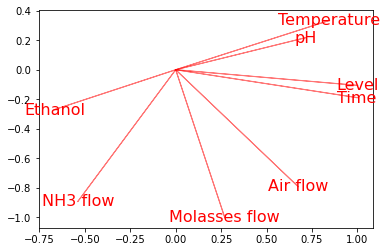

In [21]:
line_labels = loadings_pd.index
no_of_lines = len(loadings_pd.index)

p_scaled = MaxAbsScaler().fit_transform(loadings_pd.iloc[:, :2])

for i in range(no_of_lines):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
    plt.text(p_scaled[i,0], p_scaled[i,1], line_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
plt.show()

Plotting the scores curve

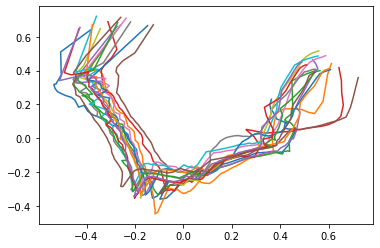

In [22]:
pivot_two_cols = pivot.loc[: , ['PC1', 'PC2']]

for batchId in pivot_two_cols.index:
    x = pivot_two_cols.loc[batchId]['PC1']
    y = pivot_two_cols.loc[batchId]['PC2']
    
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    x_scaled = x * scalex
    y_scaled = y * scaley
    plt.plot(x_scaled,y_scaled)
    
plt.show()

**5)Plot the scores-loadings plot with one line per batch**

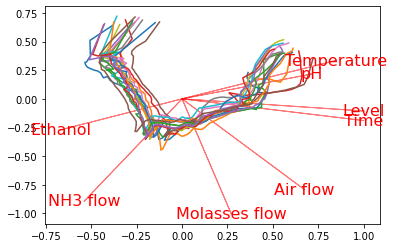

In [23]:
line_labels = loadings_pd.index
no_of_lines = len(loadings_pd.index)

p_scaled = MaxAbsScaler().fit_transform(loadings_pd.iloc[:, :2])

for i in range(no_of_lines):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
    plt.text(p_scaled[i,0], p_scaled[i,1], line_labels[i], color = 'r', ha = 'center', va = 'center', size=16)

    
pivot_two_cols = pivot.loc[: , ['PC1', 'PC2']]

for batchId in pivot_two_cols.index:
    x = pivot_two_cols.loc[batchId]['PC1']
    y = pivot_two_cols.loc[batchId]['PC2']
    
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    x_scaled = x * scalex
    y_scaled = y * scaley
    plt.plot(x_scaled,y_scaled)

**6) Explain this graph. In which quarter do the batches start and end? What happens at
the kink where the direction of the lines changes? Can you tell from this graph which
variables do not change in the rst phase and which in the second phase?**

It can be observed from the graph that 'Level' and 'Time' are directly proportional. Which means level changes linearly with time. 'Temperature' and 'pH' vary at the same rate with time. Whereas the plot of 'Ethanol' and 'NH3 flow' which are at a completely opposite direction to time indicates that these variables are independent with time. 
   The batches start in the Second quadrant, i.e in the left and ends in the first quadrant towards the right.

**7) Plot the cumulative explained variance. How much variance do the first two principal
components capture?**

In [24]:
pca.explained_variance_

array([4.23199723, 2.0501234 , 0.83070352, 0.51467663, 0.18841293])

In [25]:
pca.explained_variance_ratio_*100

array([52.86013109, 25.60724544, 10.37597485,  6.42861344,  2.3533882 ])

In [26]:
pca10 = PCA(n_components=5, svd_solver='full')

In [27]:
pca10.fit(bakers_1_scaled)

PCA(n_components=5, svd_solver='full')

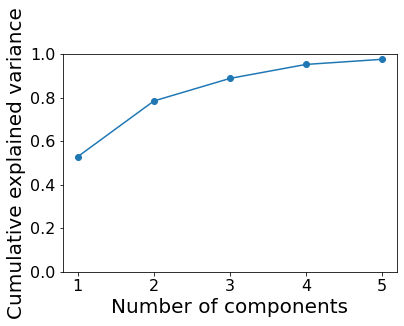

In [28]:
plt.plot(range(1,pca10.n_components+1), np.cumsum(pca10.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

It can be observed from the variance that the eigen values are reducing which are a part of PCA.
The variance ratio tells us that the first component captures 52.8% of the information, the second captures 25.6% and so on.
Cummulatively, 97.4% of the information is captured by the 5 components which makes the model commendable.

**2.2 Use the model to monitor running batches**

**1) Load the data from the file 'todays batches.xlsx' and repeat the same procedure as in
the steps 3-4 of the previous section with the exception of the PCA modeling. Here,
instead of fit the data to the model and transform, you will only transform them with
the model object you created in the previous section.**

In [29]:
todays = pd.read_excel('todays_batches.xlsx')
todays

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [30]:
todays.drop(columns = ['Unnamed: 0','Primary ID','BatchID'], inplace = True)
todays

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...
161,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [31]:
scaler = StandardScaler()
scaler

StandardScaler()

In [32]:
todays_scaled = scaler.fit_transform(todays)
todays_scaled

array([[-1.71130681, -0.93764473, -1.58215308, ..., -2.85816559,
        -1.52221206, -0.94629827],
       [-1.66956753, -0.90259207, -1.21393828, ..., -2.42978076,
        -1.50554562, -3.35993825],
       [-1.62782851, -0.65957014, -0.8850613 , ..., -2.32395849,
        -1.41650606, -3.20508094],
       ...,
       [ 1.62781988, -1.03060489,  1.88602585, ...,  0.09840552,
         2.14212646,  3.81895453],
       [ 1.66956742, -1.03082409,  1.89343156, ...,  0.13983359,
         2.1038536 ,  3.91919761],
       [ 1.71131495, -1.03101106,  1.89239635, ...,  0.12596273,
         2.14277393,  3.97499117]])

Running the principal component analysis below

In [33]:
pca_scores = pca.transform(todays_scaled)

In [34]:
pca_scores.shape

(166, 5)

In [35]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = todays.index)

In [36]:
todays_2 = pd.read_excel('todays_batches.xlsx')
scores_pd['BatchID'] = todays_2['BatchID']
scores_pd['Time'] = todays_2['Time']
scores_pd

,PC1,PC2,PC3,PC4,PC5,BatchID,Time
0,-2.940228,2.788047,1.543787,1.079616,0.794386,Ya,0.000000
1,-3.455345,2.326521,2.912030,-0.455488,0.646426,Ya,0.166667
2,-3.252958,2.312443,2.655682,-0.707357,0.510623,Ya,0.333333
3,-3.186120,0.775772,2.184541,-0.176226,-0.024210,Ya,0.500000
4,-2.820497,1.141517,1.122811,0.253313,0.025144,Ya,0.666667
...,...,...,...,...,...,...,...
161,4.123385,1.810647,-1.529059,0.960293,-0.305053,Za,13.000000
162,4.265830,1.935516,-1.768853,1.082209,-0.390455,Za,13.166700
163,4.336795,2.048642,-1.903776,1.164838,-0.440003,Za,13.333300
164,4.386626,2.048774,-1.985723,1.206895,-0.455038,Za,13.500000


In [37]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                           ,index = todays.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [38]:
pivot = pd.pivot_table(scores_pd, values=['PC1','PC2','PC3','PC4','PC5'], index=['BatchID'], columns=['Time'])
pivot

PC1                                                              \
Time    0.000000  0.166667  0.333333  0.500000  0.666667  0.833333  1.000000    
BatchID                                                                         
Ya      -2.940228 -3.455345 -3.252958 -3.186120 -2.820497 -2.744858 -3.058007   
Za      -0.731137 -2.071795 -2.624304 -2.284932 -2.005766 -1.919363 -2.015585   

                                       ...       PC5                      \
Time    1.166670  1.333330  1.500000   ... 12.166700 12.333300 12.500000   
BatchID                                ...                                 
Ya      -2.873065 -2.831912 -2.890119  ...  0.046178  0.025075 -0.007003   
Za      -2.001457 -1.812707 -1.813063  ...  0.172454  0.207606  0.260718   

                                                                               
Time    12.666700 12.833300 13.000000 13.166700 13.333300 13.500000 13.666700  
BatchID                                                                        
Ya      -0.013714  0.011528  0.047121  0.094985  0.112967  0.074865  0.141692  
Za       0.120645 -0.111497 -0.305053 -0.390455 -0.440003 -0.455038 -0.442382  

[2 rows x 415 columns]

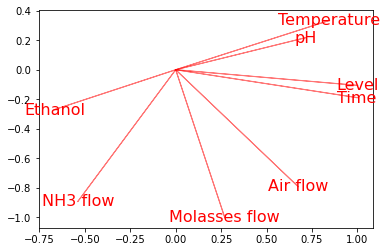

In [39]:
line_labels = loadings_pd.index
no_of_lines = len(loadings_pd.index)

p_scaled = MaxAbsScaler().fit_transform(loadings_pd.iloc[:, :2])

for i in range(no_of_lines):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
    plt.text(p_scaled[i,0], p_scaled[i,1], line_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
plt.show()

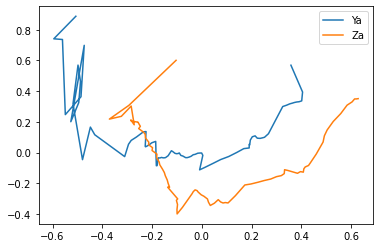

In [40]:
pivot_two_cols = pivot.loc[: , ['PC1', 'PC2']]

for batchId in pivot_two_cols.index:
    x = pivot_two_cols.loc[batchId]['PC1']
    y = pivot_two_cols.loc[batchId]['PC2']
    
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    x_scaled = x * scalex
    y_scaled = y * scaley
    plt.plot(x_scaled,y_scaled)

plt.legend(['Ya','Za'])
plt.show()

**2) Plot the same scores-loadings plot for the data in the batches you used to develop the
model with solid lines. Overlay the new incoming data from the two current batches
with dashed lines and two dierent colours to distinguish them. Also, add a legend for
the two batches so that the viewer can distinguish them**

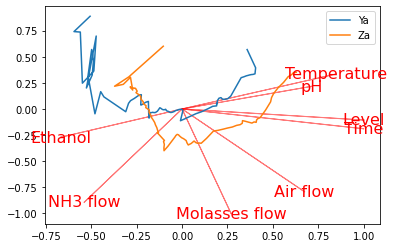

In [41]:
line_labels = loadings_pd.index
no_of_lines = len(loadings_pd.index)

p_scaled = MaxAbsScaler().fit_transform(loadings_pd.iloc[:, :2])

for i in range(no_of_lines):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
    plt.text(p_scaled[i,0], p_scaled[i,1], line_labels[i], color = 'r', ha = 'center', va = 'center', size=16)

    
pivot_two_cols = pivot.loc[: , ['PC1', 'PC2']]

for batchId in pivot_two_cols.index:
    x = pivot_two_cols.loc[batchId]['PC1']
    y = pivot_two_cols.loc[batchId]['PC2']
    
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    x_scaled = x * scalex
    y_scaled = y * scaley
    plt.plot(x_scaled,y_scaled)
    
plt.legend(['Ya','Za'])
plt.show()

**3) Do the batches show behaviour similar to that of the reference ones or there are outliers
indicating potential problems?**

From the above PCA analysis of 2 new batches we can infer that the batch 'Za'(orange line) shows a similar resemblance to the reference batch. Whereas the batch 'Ya'(blue line) behaves exactly opposite to that of reference. You can notice in 'Ya' that a lot of data points are '0' indicating that batch starts and ends at irregular intervals. These could have arised because the process was very sensitive to minor fluctuations in some variables or the control of some variables failed for a period of time.